In [1]:
# Q2
# Import necessary libraries
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Load MNIST handwritten digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Select two digits for binary classification (e.g., '3' vs '8')
selected_digits = [3, 8]
mask = (y == selected_digits[0]) | (y == selected_digits[1])
X_binary = X[mask]
y_binary = y[mask]

# Convert labels to binary: 3 -> 0, 8 -> 1
y_binary = (y_binary == selected_digits[1]).astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train linear SVM with SGDClassifier
clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.01, max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a DataFrame for readability
results_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print("Classification Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(results_df)


Classification Accuracy: 0.9861111111111112

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           41            1
Actual 1            0           30


In [2]:
#Q3
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

def myLinearSVC_fit(features, class_label, num_steps=1000, learning_rate=0.01, alpha=0.01):
    """
    Custom implementation of a binary linear SVM classifier using SGD.

    Args:
      features (np.array): Feature matrix of shape (N, d)
      class_label (np.array): Binary class labels (expected as 0 and 1)
      num_steps (int): Number of iterations (epochs)
      learning_rate (float): Learning rate for SGD updates
      alpha (float): Regularization parameter for L2 regularization

    Returns:
      w (np.array): Learned weight vector
      b (float): Learned bias term
    """
    N, d = features.shape
    w = np.zeros(d)
    b = 0

    # Convert labels from {0, 1} to {-1, 1}
    y = np.where(class_label == 0, -1, 1)

    # Perform SGD over num_steps epochs
    for step in range(num_steps):
        for i in range(N):
            # Compute decision value for the i-th sample
            decision = np.dot(w, features[i]) + b
            # Check the hinge loss condition: y_i * (w^T x_i + b) < 1
            if y[i] * decision < 1:
                # Update weights and bias when the margin is violated
                w = w - learning_rate * (-y[i] * features[i] + 2 * alpha * w)
                b = b - learning_rate * (-y[i])
            else:
                # Only apply regularization update for correctly classified samples
                w = w - learning_rate * (2 * alpha * w)
    return w, b


# Data preparation: Using MNIST digits (selecting two digits, e.g., 3 vs. 8)
digits = load_digits()
X, y = digits.data, digits.target

# Select two digits for binary classification: 3 and 8.
selected_digits = [3, 8]
mask = (y == selected_digits[0]) | (y == selected_digits[1])
X_binary = X[mask]
y_binary = y[mask]

# Convert labels to binary: assign digit 3 as 0 and digit 8 as 1.
y_binary = (y_binary == selected_digits[1]).astype(int)

# Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train our custom binary linear SVM using our own SGD implementation.
w_custom, b_custom = myLinearSVC_fit(X_train, y_train, num_steps=1000, learning_rate=0.01, alpha=0.01)


# Train Scikit-Learn's SGDClassifier for comparison.

clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.01, max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Extract the weight vector and bias from sklearn's model.
w_sklearn = clf.coef_.flatten()
b_sklearn = clf.intercept_[0]


# Compare the learned parameters.
print("Custom SVM Weights:\n", w_custom)
print("\nSklearn SVM Weights:\n", w_sklearn)
print("\nCustom Bias:", b_custom)
print("Sklearn Bias:", b_sklearn)


Custom SVM Weights:
 [ 0.00000000e+00 -1.56659694e-02 -1.73107984e-01 -1.90697592e-01
 -4.54520516e-01 -8.69593021e-02 -2.06433051e-01 -1.65686671e-02
  9.16129451e-05 -1.05343862e-01 -2.27606029e-01 -1.58500437e-01
 -3.31206014e-01  1.96951232e-01 -6.96666679e-02 -1.65686671e-02
  1.34894579e-05  4.03748706e-02  6.52074152e-01  5.85015733e-01
 -1.81989377e-01  3.53747965e-01 -2.33903776e-02  0.00000000e+00
  0.00000000e+00 -9.10572727e-02  5.40895553e-01  5.74339877e-01
 -1.32306821e-01  2.32692066e-01  7.23358715e-04  0.00000000e+00
  0.00000000e+00  3.16090390e-02  2.57918921e-01  1.56907448e-01
  1.44687629e-01  5.15120657e-02 -2.55354209e-01  0.00000000e+00
  0.00000000e+00  1.26914003e-01  6.59079719e-01  7.80444694e-01
 -9.59638982e-02 -1.38695216e-01 -2.26512257e-01  0.00000000e+00
  0.00000000e+00  6.85173044e-02  5.21160980e-02  2.28106293e-01
 -4.97354729e-01 -3.54553309e-01 -3.50702532e-01 -1.83001400e-05
  0.00000000e+00 -5.57080954e-02 -3.82777328e-01 -2.10427685e-01
 -5.

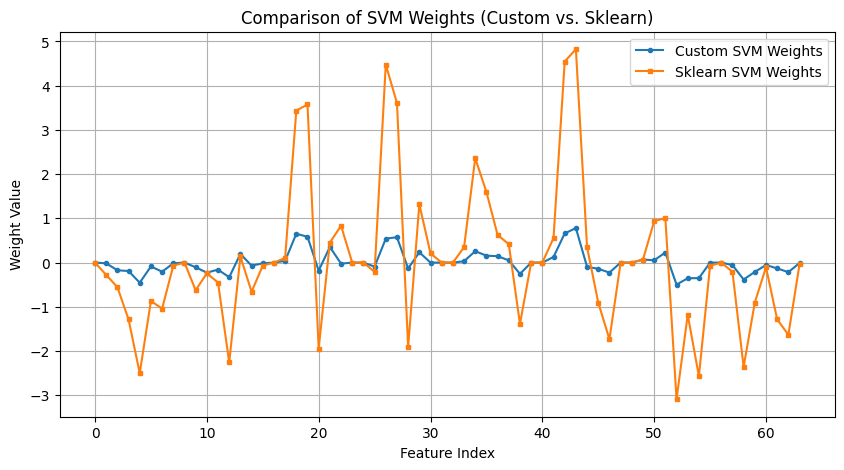

In [8]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt

# Plot comparison of weights
def plot_weight_comparison(w_custom, w_sklearn):
    """
    Plots a comparison between the weights learned by the custom SVM and Sklearn's SGDClassifier.

    Args:
        w_custom (array): Weights from custom SVM implementation.
        w_sklearn (array): Weights from Sklearn's SGDClassifier.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(w_custom, label="Custom SVM Weights", linestyle='-', marker='o', markersize=3)
    plt.plot(w_sklearn, label="Sklearn SVM Weights", linestyle='-', marker='s', markersize=3)
    plt.xlabel("Feature Index")
    plt.ylabel("Weight Value")
    plt.title("Comparison of SVM Weights (Custom vs. Sklearn)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot weight comparison
plot_weight_comparison(w_custom, w_sklearn)


In [3]:
#Q4
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

def add_gaussian_noise(X, noise_std=0.5):
    """Adds Gaussian noise with standard deviation noise_std to the dataset X."""
    noise = np.random.normal(0, noise_std, X.shape)
    return X + noise

# Load the MNIST dataset (10 digits)
digits = load_digits()
X, y = digits.data, digits.target

# Function to train and evaluate an SVM on noisy MNIST data for a given noise level.
def evaluate_noise_level(noise_std):
    # Add noise to the dataset
    X_noisy = add_gaussian_noise(X, noise_std=noise_std)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

    # Train the SVM classifier using SGDClassifier
    clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.01, max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    # Predict on test data and evaluate performance
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Noise Std = {noise_std}")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(pd.DataFrame(conf_matrix,
                       columns=[f"Pred {i}" for i in range(10)],
                       index=[f"Actual {i}" for i in range(10)]))
    print("-" * 50)
    return accuracy

# Evaluate the classifier performance for different noise levels
noise_levels = [0.0, 0.1, 0.5, 1.0]  # Adjust noise levels as desired
accuracies = {}

for noise_std in noise_levels:
    accuracies[noise_std] = evaluate_noise_level(noise_std)


Noise Std = 0.0
Accuracy: 0.9611111111111111
Confusion Matrix:
          Pred 0  Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  \
Actual 0      33       0       0       0       0       0       0       0   
Actual 1       0      28       0       0       0       0       0       0   
Actual 2       0       0      33       0       0       0       0       0   
Actual 3       0       0       0      33       0       1       0       0   
Actual 4       0       0       0       0      46       0       0       0   
Actual 5       0       0       0       0       0      46       1       0   
Actual 6       0       0       0       0       0       1      34       0   
Actual 7       0       0       0       0       0       1       0      33   
Actual 8       0       2       0       1       1       1       1       0   
Actual 9       0       0       0       0       0       2       0       0   

          Pred 8  Pred 9  
Actual 0       0       0  
Actual 1       0       0  
Actual 2       0   

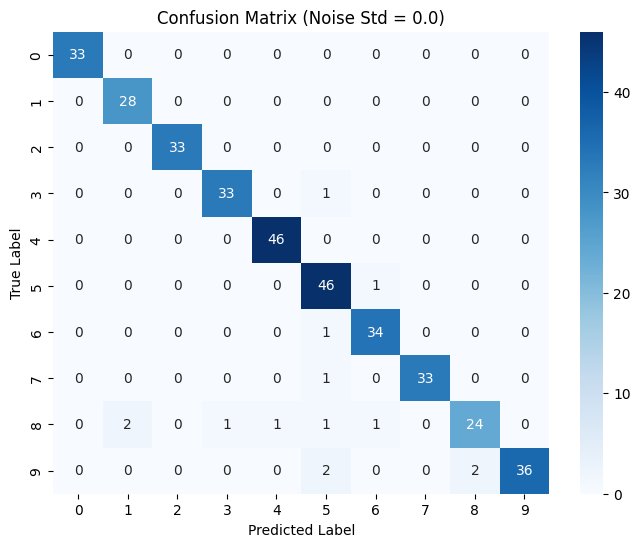

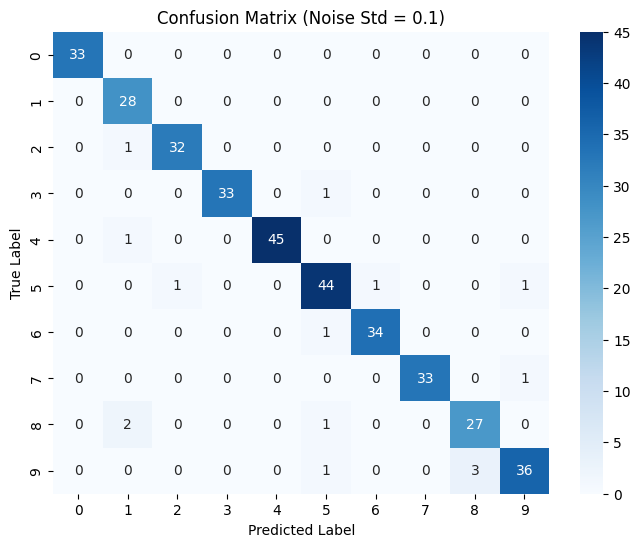

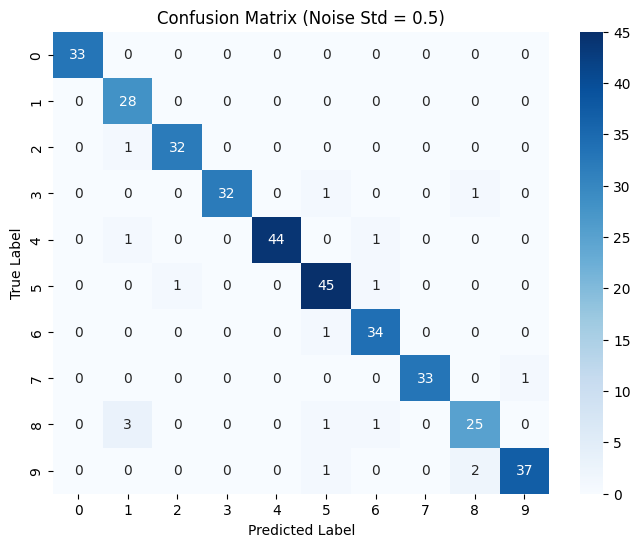

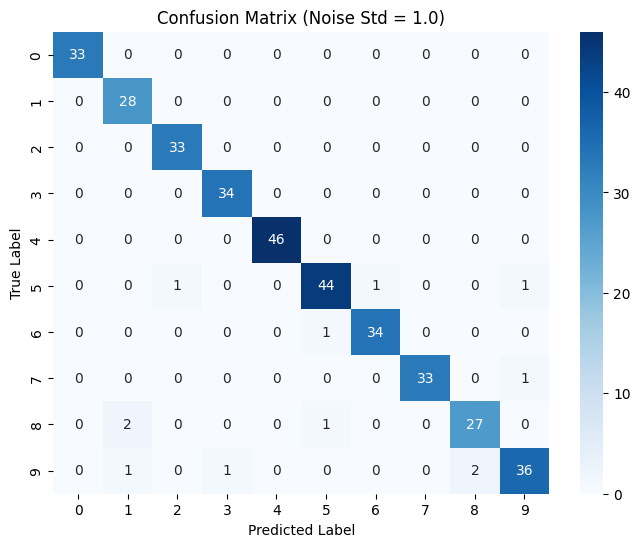

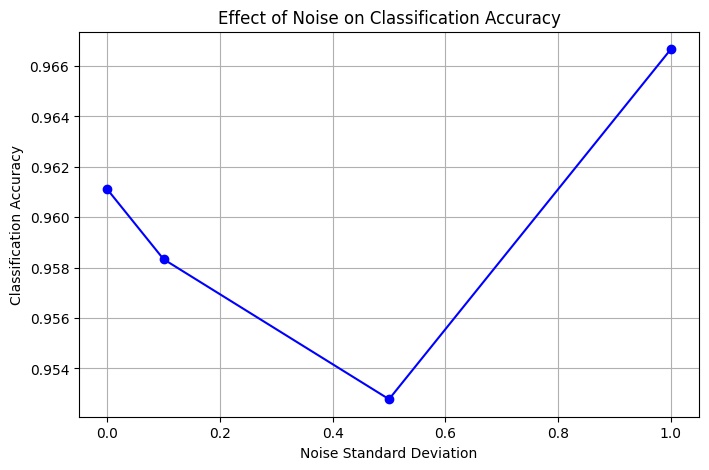

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, noise_std):
    """
    Plots a confusion matrix for given true and predicted labels.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        noise_std (float): Standard deviation of Gaussian noise (for title annotation).
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix (Noise Std = {noise_std})")
    plt.show()

# Function to plot accuracy trend across noise levels
def plot_accuracy_trend(noise_levels, accuracies):
    """
    Plots classification accuracy vs. noise levels.

    Args:
        noise_levels (list): List of noise standard deviations.
        accuracies (dict): Dictionary mapping noise levels to accuracy values.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(noise_levels, list(accuracies.values()), marker='o', linestyle='-', color='blue')
    plt.xlabel("Noise Standard Deviation")
    plt.ylabel("Classification Accuracy")
    plt.title("Effect of Noise on Classification Accuracy")
    plt.grid(True)
    plt.show()

# Evaluate classifier and generate confusion matrices and accuracy trend graph
accuracies = {}
for noise_std in noise_levels:
    # Add noise to dataset
    X_noisy = add_gaussian_noise(X, noise_std=noise_std)

    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

    # Train the classifier
    clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.01, max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)

    # Predict and evaluate performance
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[noise_std] = accuracy

    # Generate confusion matrix plot
    plot_confusion_matrix(y_test, y_pred, noise_std)

# Generate accuracy trend plot
plot_accuracy_trend(noise_levels, accuracies)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, noise_std):
    """
    Plots a confusion matrix for given true and predicted labels.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        noise_std (float): Standard deviation of Gaussian noise (for title annotation).
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix (Noise Std = {noise_std})")
    plt.show()

# Example usage (Replace y_test, y_pred with actual values from your model evaluation)
# noise_std = 0.5  # Example noise level
# plot_confusion_matrix(y_test, y_pred, noise_std)


In [4]:
#Q5
from tensorflow.keras.datasets import cifar100
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
y_train = y_train.ravel()
y_test = y_test.ravel()

# Flatten images (each image becomes a vector)
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Optional: Dimensionality Reduction using PCA
pca = PCA(n_components=100)  # Retain 100 principal components
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Train linear SVM using SGDClassifier
clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.01, max_iter=1000, random_state=42)
clf.fit(x_train_pca, y_train)

# Evaluate performance on the test set
y_pred = clf.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("CIFAR-100 Classification Accuracy:", accuracy)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
CIFAR-100 Classification Accuracy: 0.1425
